## K-NEAREST NEIGHBOURS

### Feature set

In [1]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
from dateutil import parser

import warnings
warnings.filterwarnings("ignore")

In [2]:
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df_boston=pd.read_csv("Boston/boston_2015.csv", parse_dates=['start_time', "end_time"], date_parser=mydateparser)

In [3]:
df_boston = df_boston.drop(df_boston.index[21566])

In [4]:
df_weather=pd.read_csv("Boston/weather_hourly_boston.csv")

In [5]:
df_weather = df_weather.dropna()
df_weather.reset_index(drop=True, inplace=True)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43354 entries, 0 to 43353
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43354 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [6]:
df_weather["date_time"]=pd.to_datetime(df_weather["date_time"])

In [7]:
df_weather.sort_values("date_time",ignore_index=True, inplace=True,ascending=True)
df_weather

,date_time,max_temp,min_temp,precip
0,2015-01-01 06:00:00,-5.6,-5.6,0.0
1,2015-01-01 07:00:00,-5.6,-5.6,0.0
2,2015-01-01 08:00:00,-5.6,-5.6,0.0
3,2015-01-01 09:00:00,-4.4,-4.4,0.0
4,2015-01-01 10:00:00,-5.6,-5.6,0.0
...,...,...,...,...
43349,2020-01-02 01:00:00,3.3,3.3,0.0
43350,2020-01-02 02:00:00,3.3,3.3,0.0
43351,2020-01-02 03:00:00,2.8,2.8,0.0
43352,2020-01-02 04:00:00,2.8,2.8,0.0


In [8]:
only_2015=datetime.strptime("2016-01-01", "%Y-%m-%d")
only_2015

datetime.datetime(2016, 1, 1, 0, 0)

In [9]:
df_weather=df_weather[df_weather["date_time"]<only_2015]

In [10]:
df_boston=df_boston.drop(columns=["start_station_id", "end_station_id","start_station_name","end_station_name","bike_id","user_type","end_time"])

In [11]:
df_weather["mean_temp"]=(df_weather["max_temp"]+df_weather["min_temp"])/2

In [12]:
for x in range(len(df_weather)):
    mean=df_weather["mean_temp"][x]
    pre=df_weather["precip"][x]
    date1=df_weather["date_time"][x]
    df_boston.at[(df_boston["start_time"]>=date1) & (df_boston["start_time"]<date1+timedelta(hours=1)),"mean_temp"]=mean
    df_boston.at[(df_boston["start_time"]>=date1) & (df_boston["start_time"]<date1+timedelta(hours=1)),"precip"]=pre 

In [13]:
len(df_weather)

8622

In [14]:
df_boston=df_boston.dropna()
df_boston.reset_index(drop=True, inplace=True)

In [15]:
df_boston["precip"]=df_boston["precip"].astype(int)
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056172 entries, 0 to 1056171
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   start_time  1056172 non-null  datetime64[ns]
 1   mean_temp   1056172 non-null  float64       
 2   precip      1056172 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 24.2 MB


In [16]:
df_boston['rushhour'] = df_boston['start_time'].apply(lambda x: 1 if (7<=x.hour<=9) or (16<=x.hour<=18)  else 0)

In [19]:
abc = {'1':3, '2':3, '3': 0, '4':0, '5':0, '6':1, '7':1, '8':1, '9':2, '10':2, '11':2, '12':3}
df_boston['season']=df_boston['start_time'].apply(lambda x: abc.get(str(x.month)))
df_boston


,start_time,mean_temp,precip,rushhour,season
0,2015-01-01 08:00:15,-5.6,0,1,3
1,2015-01-01 08:22:12,-5.6,0,1,3
2,2015-01-01 08:29:05,-5.6,0,1,3
3,2015-01-01 08:58:16,-5.6,0,1,3
4,2015-01-01 09:15:26,-4.4,0,1,3
...,...,...,...,...,...
1056167,2015-12-31 23:35:04,5.6,0,0,3
1056168,2015-12-31 23:37:29,5.6,0,0,3
1056169,2015-12-31 23:38:16,5.6,0,0,3
1056170,2015-12-31 23:46:04,5.6,0,0,3


In [20]:
df_boston.loc[500000]

start_time    2015-07-29 17:14:02
mean_temp                    29.4
precip                          0
rushhour                        1
season                          1
Name: 500000, dtype: object

In [21]:
def get_weekday (ts):
    return ts.weekday()
#0=Monday 6=Sunday
df_boston["Weekday"]=df_boston["start_time"].apply(lambda x:1 if 0<=get_weekday(x)<5 else 0)

In [22]:
df_boston

,start_time,mean_temp,precip,rushhour,season,Weekday
0,2015-01-01 08:00:15,-5.6,0,1,3,1
1,2015-01-01 08:22:12,-5.6,0,1,3,1
2,2015-01-01 08:29:05,-5.6,0,1,3,1
3,2015-01-01 08:58:16,-5.6,0,1,3,1
4,2015-01-01 09:15:26,-4.4,0,1,3,1
...,...,...,...,...,...,...
1056167,2015-12-31 23:35:04,5.6,0,0,3,1
1056168,2015-12-31 23:37:29,5.6,0,0,3,1
1056169,2015-12-31 23:38:16,5.6,0,0,3,1
1056170,2015-12-31 23:46:04,5.6,0,0,3,1


In [23]:
df_boston['time'] = df_boston['start_time'].dt.time

### Dataframe for KNN

In [24]:
df_try = df_weather

In [25]:
df_try['rushhour'] = df_try['date_time'].apply(lambda x: 1 if (7<=x.hour<=9) or (16<=x.hour<=18)  else 0)

abc = {'1':3, '2':3, '3': 0, '4':0, '5':0, '6':1, '7':1, '8':1, '9':2, '10':2, '11':2, '12':3}
df_try['season']=df_try['date_time'].apply(lambda x: abc.get(str(x.month)))

def get_weekday (ts):
    return ts.weekday()
#0=Monday 6=Sunday
df_try["Weekday"]=df_try["date_time"].apply(lambda x:1 if 0<=get_weekday(x)<5 else 0)

In [28]:
p_time=datetime.strptime("2015-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
df_try["count"]=0
for i in range(len(df_try)):
    p_time = df_try["date_time"][i]
    p_time_next = df_try["date_time"][i+1]
    df_akt=df_boston[(df_boston["start_time"]>=p_time) & (df_boston["start_time"]<p_time_next)]
    df_akt=df_akt.reset_index()
    count=None
    if len(df_akt) is not 0:
        count=len(df_akt)
    df_try["count"][i]=count
    count=None

KeyError: 8622

In [29]:
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8622 entries, 0 to 8621
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8622 non-null   datetime64[ns]
 1   max_temp   8622 non-null   float64       
 2   min_temp   8622 non-null   float64       
 3   precip     8622 non-null   float64       
 4   mean_temp  8622 non-null   float64       
 5   rushhour   8622 non-null   int64         
 6   season     8622 non-null   int64         
 7   Weekday    8622 non-null   int64         
 8   count      7674 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 993.6 KB


In [30]:
df_try=df_try[df_try["count"]>=1]

In [31]:
df_try.sort_values(by="count")

,date_time,max_temp,min_temp,precip,mean_temp,rushhour,season,Weekday,count
1633,2015-03-11 00:00:00,5.0,5.0,0.0,5.0,0,0,1,1.0
6227,2015-09-22 03:00:00,14.4,14.4,0.0,14.4,0,2,1,1.0
2106,2015-03-31 04:00:00,3.9,3.9,0.0,3.9,0,0,1,1.0
6274,2015-09-24 03:00:00,15.6,15.6,0.0,15.6,0,2,1,1.0
2082,2015-03-30 01:00:00,2.2,2.2,0.0,2.2,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...
4640,2015-07-16 17:00:00,18.9,18.9,0.0,18.9,1,1,1,878.0
4757,2015-07-21 17:00:00,23.9,23.9,0.0,23.9,1,1,1,885.0
4780,2015-07-22 17:00:00,27.8,27.8,0.0,27.8,1,1,1,889.0
4804,2015-07-23 17:00:00,25.0,25.0,0.0,25.0,1,1,1,909.0


In [32]:
# 0-1 scaling: substract min, divide by range

# x_nor = (xp-min(xp))/(max(xp)-min(xp))

# y_nor = (yp-min(yp))/(max(yp)-min(yp))

In [35]:
xp_all = df_try["mean_temp"].values
yp_all = df_try["count"].values

# Spring and weekday
xp_spring_wd = df_try[(df_try["season"]==0) & (df_try["Weekday"]==1)]
xp_spring_wd = xp_spring_wd["mean_temp"].values
yp_spring_wd = df_try[(df_try["season"]==0) & (df_try["Weekday"]==1)]
yp_spring_wd = yp_spring_wd["count"].values

# Spring and weekend
xp_spring_we = df_try[(df_try["season"]==0) & (df_try["Weekday"]==0)]
xp_spring_we = xp_spring_we["mean_temp"].values
yp_spring_we = df_try[(df_try["season"]==0) & (df_try["Weekday"]==0)]
yp_spring_we = yp_spring_we["count"].values

# Summer and weekday
xp_summer_wd = df_try[(df_try["season"]==1) & (df_try["Weekday"]==1)]
xp_summer_wd = xp_summer_wd["mean_temp"].values
yp_summer_wd = df_try[(df_try["season"]==1) & (df_try["Weekday"]==1)]
yp_summer_wd = yp_summer_wd["count"].values

# Summer and weekend
xp_summer_we = df_try[(df_try["season"]==1) & (df_try["Weekday"]==0)]
xp_summer_we = xp_summer_we["mean_temp"].values
yp_summer_we = df_try[(df_try["season"]==1) & (df_try["Weekday"]==0)]
yp_summer_we = yp_summer_we["count"].values

# Autumn and weekday
xp_autumn_wd = df_try[(df_try["season"]==2) & (df_try["Weekday"]==1)]
xp_autumn_wd = xp_autumn_wd["mean_temp"].values
yp_autumn_wd = df_try[(df_try["season"]==2) & (df_try["Weekday"]==1)]
yp_autumn_wd = yp_autumn_wd["count"].values

# Autumn and weekend
xp_autumn_we = df_try[(df_try["season"]==2) & (df_try["Weekday"]==0)]
xp_autumn_we = xp_autumn_we["mean_temp"].values
yp_autumn_we = df_try[(df_try["season"]==2) & (df_try["Weekday"]==0)]
yp_autumn_we = yp_autumn_we["count"].values

# Winter and weekday
xp_winter_wd = df_try[(df_try["season"]==3) & (df_try["Weekday"]==1)]
xp_winter_wd = xp_winter_wd["mean_temp"].values
yp_winter_wd = df_try[(df_try["season"]==3) & (df_try["Weekday"]==1)]
yp_winter_wd = yp_winter_wd["count"].values

# Winter and weekend
xp_winter_we = df_try[(df_try["season"]==3) & (df_try["Weekday"]==0)]
xp_winter_we = xp_winter_we["mean_temp"].values
yp_winter_we = df_try[(df_try["season"]==3) & (df_try["Weekday"]==0)]
yp_winter_we = yp_winter_we["count"].values

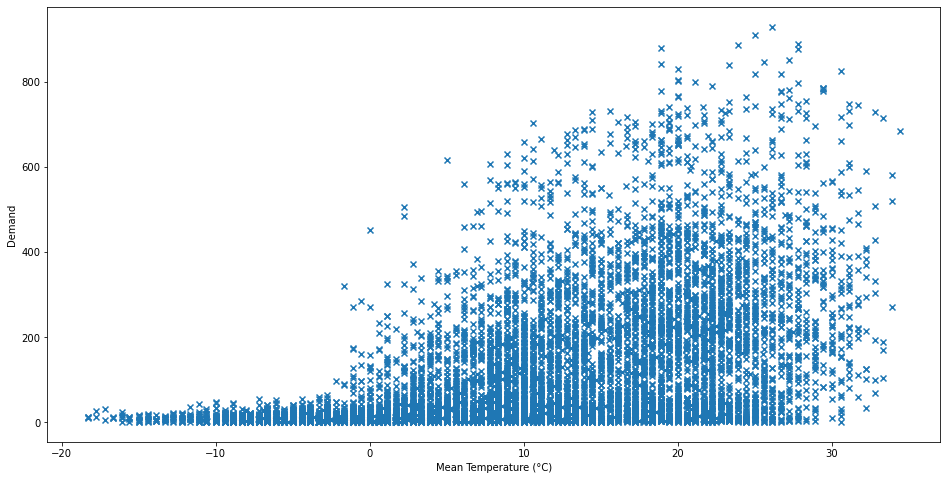

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
plt.scatter(xp_all, yp_all, marker="x")
#plt.plot(np.arange(-18,40,1), KNN_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='C1')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand")
plt.show()

<Figure size 1080x576 with 0 Axes>

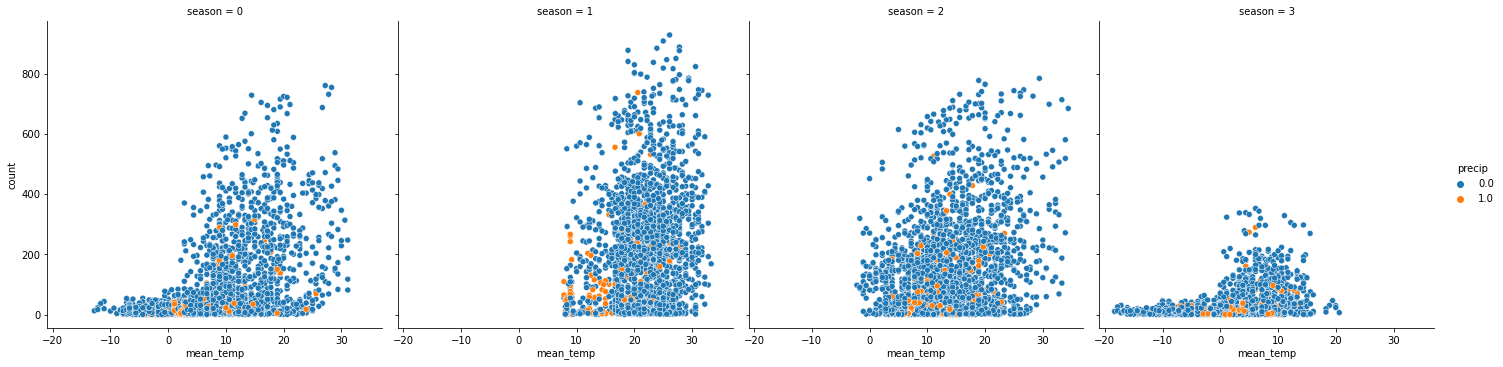

In [38]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.relplot(x="mean_temp", y="count", hue="precip",
            col="season", data=df_try)

## Use KNN

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [40]:
x_train, x_test, y_train, y_test = train_test_split(xp_all, yp_all, test_size=0.3,random_state=10)

In [41]:
x_train

array([18.3,  5. , 27.8, ..., 23.3, 10.6, -2.2])

In [58]:
# Spring and weekday
xp_spring = df_try[(df_try["season"]==0)]
#xp_spring_wd = xp_spring_wd["mean_temp"].values
yp_spring = df_try[(df_try["season"]==0)]
#yp_spring_wd = yp_spring_wd["count"].values

# Spring and weekday
xp_summer = df_try[(df_try["season"]==1)]
#xp_spring_wd = xp_spring_wd["mean_temp"].values
yp_summer = df_try[(df_try["season"]==1)]
#yp_spring_wd = yp_spring_wd["count"].values

#### Divided by seasons

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
plt.scatter(xp_spring, yp_spring, marker='x', color="C0")
plt.xlabel("Mean Teamperature (°C)")
plt.ylabel("Demand (Count)")
plt.title("Spring")
plt.subplot(2,2,2)
plt.scatter(xp_summer, yp_summer, marker='x', color="C0")
plt.xlabel("Mean Teamperature (°C)")
plt.ylabel("Demand (Count)")
plt.title("Summer")
plt.subplot(2,2,3)
plt.scatter(xp_autumn, yp_autumn, marker='x', color="C0")
plt.xlabel("Mean Teamperature (°C)")
plt.ylabel("Demand (Count)")
plt.title("Autumn")
plt.subplot(2,2,4)
plt.scatter(xp_winter, yp_winter, marker='x', color="C0")
plt.xlabel("Mean Teamperature (°C)")
plt.ylabel("Demand (Count)")
plt.title("Winter")
plt.show()

#### KNN general

In [79]:
from sklearn.neighbors import KNeighborsRegressor

def do_knn(xp, yp, n):
    
    x_train, x_test, y_train, y_test = train_test_split(xp, yp, test_size=0.3,random_state=10)
    #Fit model
    KNN_reg = KNeighborsRegressor(n_neighbors=n)
    KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train) 

    # Predict
    y_hat_KNN = KNN_model.predict(x_test.reshape((-1,1)))
    
    print("Test set performance:")
    print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "Bikes")
    print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "Bikes")  
    print("R2:",r2_score(y_hat_KNN, y_test))
    
    return KNN_reg, KNN_model, y_hat_KNN
    

In [80]:
spring_wd_reg, spring_wd_model, spring_wd_hat = do_knn(xp_spring_wd, yp_spring_wd, 50)

Test set performance:
MAE: 82.56254807692306 Bikes
RMSE: 124.66874689706566 Bikes
R2: -1.315051889225706


Test set performance:
MAE: 82.44598858173077 Bikes
RMSE: 124.5755097101152 Bikes
R2: -1.0730858518416428
Test set performance:
MAE: 87.8184880239521 Bikes
RMSE: 113.11313514010564 Bikes
R2: -2.3416482454443868
Test set performance:
MAE: 155.6706023755656 Bikes
RMSE: 195.39368557588483 Bikes
R2: -9.915447010750796
Test set performance:
MAE: 126.67635233918129 Bikes
RMSE: 142.4102870131808 Bikes
R2: -12.431597980727762


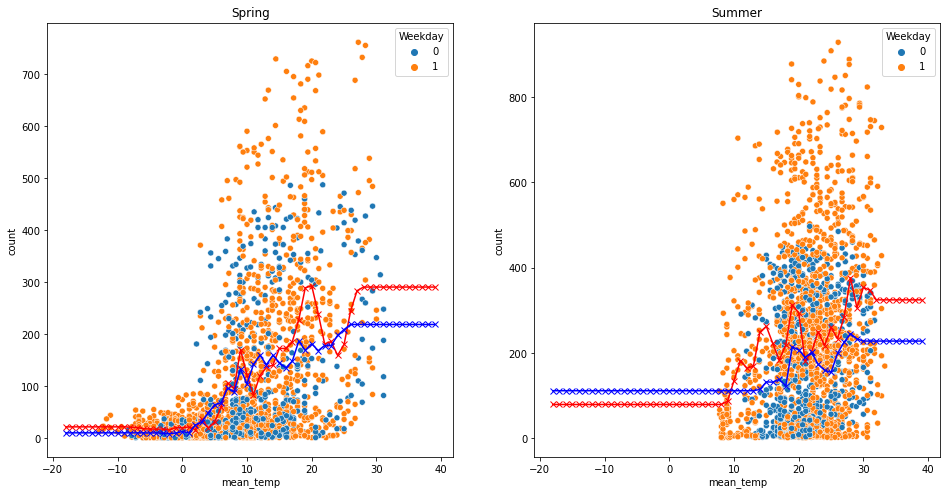

In [88]:
spring_wd_reg, spring_wd_model, spring_wd_hat = do_knn(xp_spring_wd, yp_spring_wd, 32)

spring_we_reg, spring_we_model, spring_we_hat = do_knn(xp_spring_we, yp_spring_we, 32)


plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.title("Spring")
sns.scatterplot(x=xp_spring["mean_temp"], y=xp_spring["count"], 
                hue=xp_spring["Weekday"])
plt.plot(np.arange(-18,40,1), spring_wd_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='r')
plt.plot(np.arange(-18,40,1), spring_we_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='b')

summer_wd_reg, summer_wd_model, summer_wd_hat = do_knn(xp_summer_wd, yp_summer_wd, 32)

summer_we_reg, summer_we_model, summer_we_hat = do_knn(xp_summer_we, yp_summer_we, 32)

plt.subplot(1,2,2)
plt.title("Summer")
sns.scatterplot(x=xp_summer["mean_temp"], y=xp_summer["count"], 
                hue=xp_summer["Weekday"])
plt.plot(np.arange(-18,40,1), summer_wd_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='r')
plt.plot(np.arange(-18,40,1), summer_we_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='b')

plt.show()

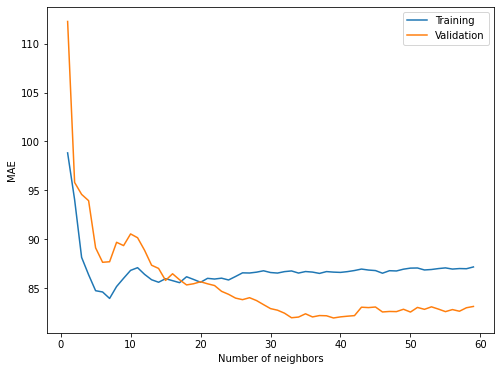

In [84]:
find_knn(xp_spring_wd,yp_spring_wd,60)

In [ ]:
    #print("Test set performance:")
    #print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "Bikes")
    #print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "Bikes")  
    #print("R2:",r2_score(y_hat_KNN, y_test))

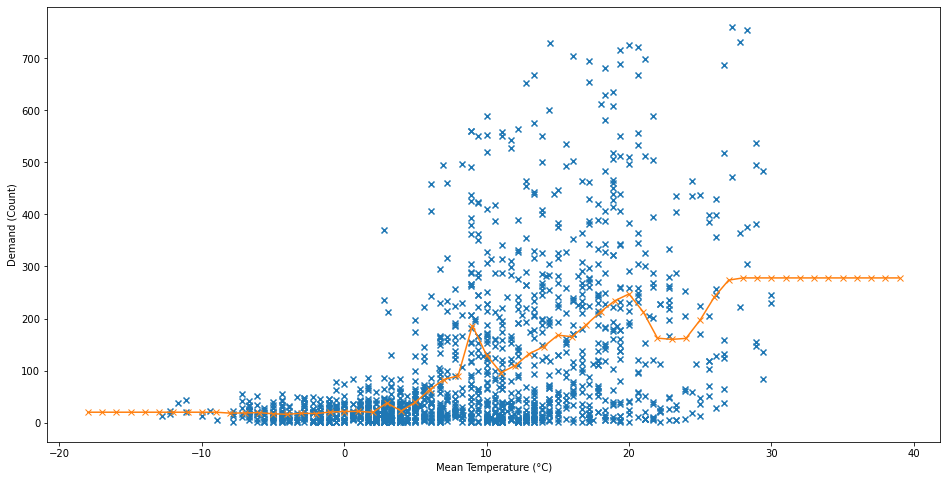

In [46]:
do_knn(xp_spring, yp_spring, 50)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#Fit model
KNN_reg = KNeighborsRegressor(n_neighbors=100)
KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train) 

# Predict
y_hat_KNN = KNN_model.predict(x_test.reshape((-1,1)))

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(x_train, y_train, marker="x")
plt.plot(np.arange(-18,40,1), KNN_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='C1')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Count)")
plt.show()

In [ ]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "Bikes")  
print("R2:",r2_score(y_hat_KNN, y_test))

#### KNN Spring

In [ ]:
#Fit model
KNN_reg = KNeighborsRegressor(n_neighbors=100)
KNN_model = KNN_reg.fit(xp_spring.reshape((-1,1)), yp_spring) 

# Predict
y_hat_KNN = KNN_model.predict(xp_spring.reshape((-1,1)))

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(xp_spring, yp_spring, marker="x")
plt.plot(np.arange(-18,40,1), KNN_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='C1')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Count)")
plt.show()

In [ ]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, yp_spring), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_KNN, yp_spring))**(0.5), "Bikes")  
print("R2:",r2_score(y_hat_KNN, yp_spring))

In [83]:
def find_knn (x,y,max_k):
    
    err_train = [] 
    err_test = []
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train)


        # compute errors
        err_train.append(mean_absolute_error(KNN_model.predict(x_train.reshape((-1,1))), y_train))
        err_test.append(mean_absolute_error(KNN_model.predict(x_test.reshape((-1,1))), y_test))
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("MAE")
    #plt.ylim((0,1))
    plt.show()

In [ ]:
find_knn(xp,yp,200)

In [ ]:
dict = {}
for i in range(24):
    df = df_boston[df_boston["start_time"].dt.hour == i]
    count = len(df)
    dict[str(i)] = count
  

In [ ]:
dict
xp = np.array([])
for i in range(24):
    xp = np.append(xp, int(dict.get(str(i))))
xp